In [93]:
import numpy as np

In [94]:
from matplotlib import pyplot as plt


In [225]:
class kmeans_cluster:
    
    def __init__(self,dataset,centres):
        height = np.random.normal(130,10,100)
        height = np.c_[height]

        weight = np.random.normal(60,10,100)
        weight = np.c_[weight]
    
        
        self.centres = [[140,70],[150,75]]


        self.dataset = np.hstack([height,weight])
    
    
    
    def kmeans(self,dataset,prev_centres,centres):
        
        while np.all(prev_centres != np.array([centres])):
            
            cluster_set = {key: np.array([[0,0]]) for key in range(len(centres))}
            for pt in dataset:
                
                dist = np.linalg.norm(pt - np.c_[centres],axis=1)
                mindist_ind = np.argmin(dist)
                
                temp = cluster_set[mindist_ind]
                cluster_set[mindist_ind] = np.vstack([temp,pt])
               
            for c in range(len(centres)):
                temp = cluster_set[c]
                cluster_set[c] = temp[1:]
            
            
            for i in range(len(centres)):
                if(len(cluster_set[i]) > 0):
                    prev_centres[i] = centres[i]
                    temp = cluster_set[i]
                    temp1 = temp[:,0].mean()
                    temp2 = temp[:,1].mean()
                    temp1 = np.hstack([temp1,temp2])
                    centres[i] = temp1 
                else:
                    prev_centres[i] = centres[i]
            self.plotpoints(clusters,self.centres)
            plt.show()
    
    
    def find_clusters(self,dataset,centres):
            cluster_set = {key: np.array([[0,0]]) for key in range(len(centres))}
            for pt in dataset:
                
                dist = np.linalg.norm(pt - np.c_[centres],axis=1)
                mindist_ind = np.argmin(dist)
                
                temp = cluster_set[mindist_ind]
                cluster_set[mindist_ind] = np.vstack([temp,pt])
               
            
            for c in range(len(centres)):
                temp = cluster_set[c]
                cluster_set[c] = temp[1:]
          
            return cluster_set
    
    def plotpoints(self,cluster_dict,centres):
        
        for x in range(len(centres)):
            
            dist = np.linalg.norm(centres[x] - cluster_dict[x],axis = 1)
            
            dist = np.array(dist,dtype='int')
            colors = abs(dist/np.max(dist))
            colors = np.tile(colors,3).reshape((3,len(colors)))
            
            
            
            col = np.array([0])
            for t in range(len(colors)):
                row = colors[:,t]
                col = np.hstack([col,tuple(row.flatten())])
           
            
            plt.plot(cluster_dict[x][:,0],cluster_dict[x][:,1],'o')
            plt.plot(centres[x][0],centres[x][1],'*')

        
    

In [226]:
dataset = 1
centres = 1
t = kmeans_cluster(dataset,centres)

In [227]:
prev_centres = np.full((len(t.centres),2),float('inf'))

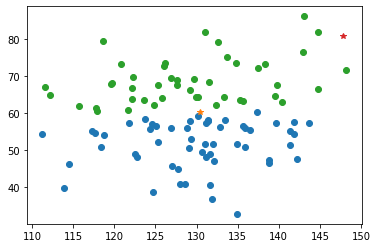

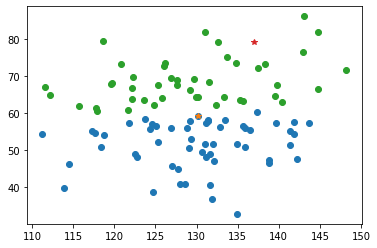

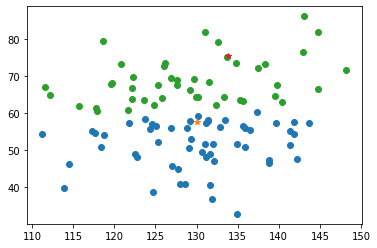

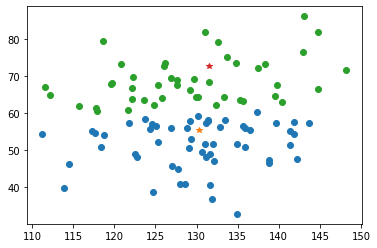

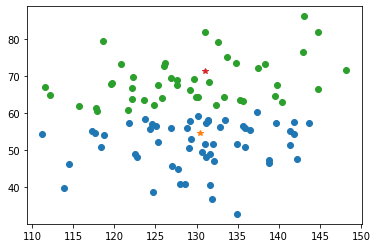

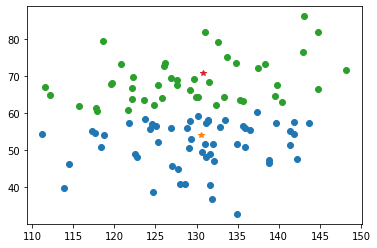

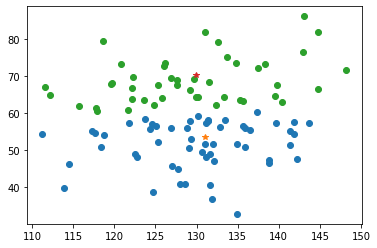

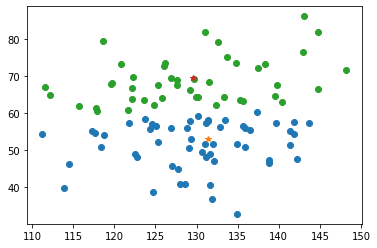

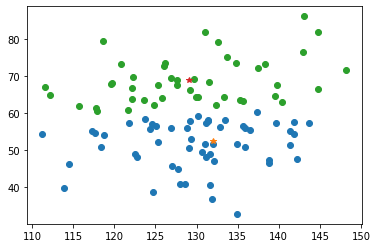

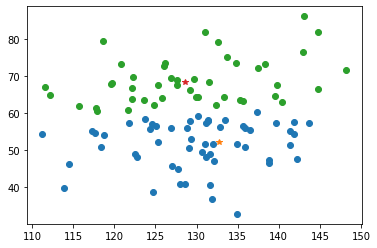

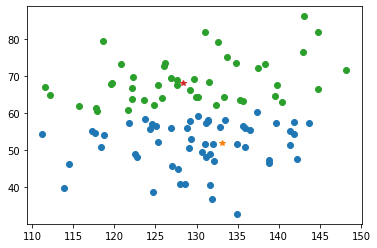

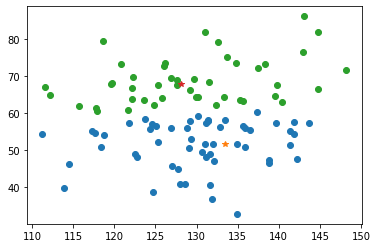

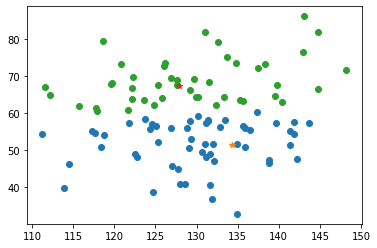

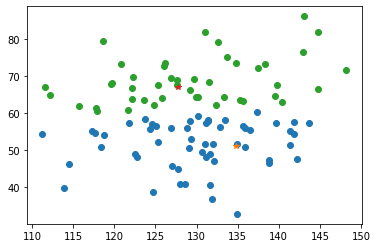

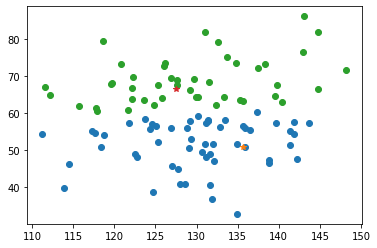

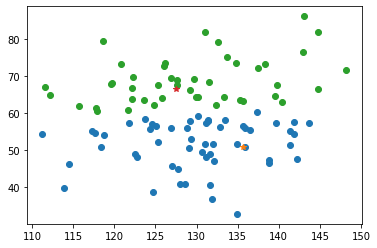

In [228]:
t.kmeans(t.dataset,prev_centres,t.centres)

In [216]:
t.centres

[array([129.19406836,  53.63904099]), array([132.42266123,  69.05318592])]

In [201]:
clusters = t.find_clusters(t.dataset,t.centres)

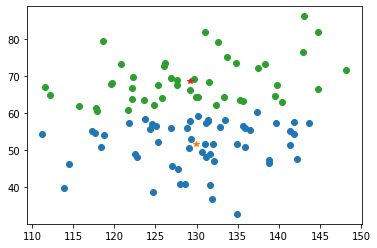

In [202]:
t.plotpoints(clusters,t.centres)